# Prerequisites

In [88]:
!pip install scikit-learn pandas numpy matplotlib seaborn

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


# Data cleanup

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

url = 'https://raw.githubusercontent.com/ElianDochev/TBS-Homework-3/refs/heads/main/1429_1.csv'
df = pd.read_csv(url)
# print the row count and column count of the dataset
print(df.shape)
# print the first 5 rows of the dataset
df.head()

(34660, 21)


/tmp/ipykernel_13849/295036324.py:8: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [90]:
# print the column names of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

In [91]:
# check for duplicates 
df.duplicated().sum()

np.int64(0)

there are no duplicates in the dataset

In [92]:
df.isnull().sum() # check for missing values

id                          0
name                     6760
asins                       2
brand                       0
categories                  0
keys                        0
manufacturer                0
reviews.date               39
reviews.dateAdded       10621
reviews.dateSeen            0
reviews.didPurchase     34659
reviews.doRecommend       594
reviews.id              34659
reviews.numHelpful        529
reviews.rating             33
reviews.sourceURLs          0
reviews.text                1
reviews.title               6
reviews.userCity        34660
reviews.userProvince    34660
reviews.username            7
dtype: int64

a lot of the values are missing speficically:

| Column                     | Missing Values       | % Missing | Action              |
|----------------------------|----------------------|-----------|-----------------------------|
| reviews.didPurchase        | 34,659 / 34,660     | 99.99%    | Drop  |
| reviews.id                 | 34,659 / 34,660     | 99.99%    | Drop  |
| reviews.userCity           | 34,660 / 34,660     | 100%      | Drop         |
| reviews.userProvince       | 34,660 / 34,660     | 100%      | Drop         |


In [93]:
df.drop(columns=['reviews.didPurchase', 'reviews.id', 'reviews.userCity', 'reviews.userProvince'], inplace=True)
print(df.isnull().sum()) # check for missing values after dropping columns with more than 99.9% missing values
df.head()

id                         0
name                    6760
asins                      2
brand                      0
categories                 0
keys                       0
manufacturer               0
reviews.date              39
reviews.dateAdded      10621
reviews.dateSeen           0
reviews.doRecommend      594
reviews.numHelpful       529
reviews.rating            33
reviews.sourceURLs         0
reviews.text               1
reviews.title              6
reviews.username           7
dtype: int64


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",True,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",True,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",True,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",True,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",True,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,explore42


we still have a lot of missing values so we will adress them now

| Column                 | Missing Values    | % Missing | Action                               |
|------------------------|-------------------|-----------|---------------------------------------------|
| asins                 | 2 / 34,660        | 0.005%    | Fill with `"Unknown"`                       |
| reviews.date          | 39 / 34,660       | 0.1%      | Keep as `NaT` or fill with mode (most common date) |
| reviews.doRecommend   | 594 / 34,660      | 1.7%      | Fill with mode (`True` or `False`)          |
| reviews.numHelpful    | 529 / 34,660      | 1.5%      | Fill with median (since it's numeric)       |
| reviews.rating        | 33 / 34,660       | 0.09%     | Fill with median rating                     |
| reviews.text          | 1 / 34,660        | 0.002%    | Fill with empty string (`""`)               |
| reviews.title         | 6 / 34,660        | 0.017%    | Fill with empty string (`""`)               |
| reviews.username      | 7 / 34,660        | 0.02%     | Fill with `"Unknown"`                       |


In [94]:
df.loc[:, 'reviews.doRecommend'] = df['reviews.doRecommend'].fillna(df['reviews.doRecommend'].mode()[0])
df.loc[:, 'reviews.username'] = df['reviews.username'].fillna("Unknown")
df.loc[:, 'reviews.numHelpful'] = df['reviews.numHelpful'].fillna(df['reviews.numHelpful'].median())
df.loc[:, 'reviews.rating'] = df['reviews.rating'].fillna(df['reviews.rating'].median())
df.loc[:, 'reviews.text'] = df['reviews.text'].fillna("")
df.loc[:, 'reviews.title'] = df['reviews.title'].fillna("")
df.loc[:, 'name'] = df['name'].fillna(df['brand']).fillna(df['categories']).fillna("Unknown")
df.loc[:, 'asins'] = df['asins'].fillna("Unknown")
df.loc[:, 'reviews.date'] = df['reviews.date'].fillna(df['reviews.date'].mode()[0])
# fill missing values in reviews.dateAdded with the minimum value in the column maybe not the best approach
df.loc[:, 'reviews.dateAdded'] = pd.to_datetime(df['reviews.dateAdded'], errors='coerce', utc=True)
df['reviews.dateAdded'] = pd.to_datetime(df['reviews.dateAdded'], errors='coerce', utc=True)
df['reviews.dateSeen'] = pd.to_datetime(df['reviews.dateSeen'], errors='coerce', utc=True)
df['reviews.date'] = pd.to_datetime(df['reviews.date'], errors='coerce', utc=True)
df.info()

df.loc[:, 'reviews.date'] = pd.to_datetime(df['reviews.date'], errors='coerce', utc=True)
df.nunique()

# df.isnull().sum() # check for missing values after imputation


/tmp/ipykernel_13849/3145665128.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[:, 'reviews.doRecommend'] = df['reviews.doRecommend'].fillna(df['reviews.doRecommend'].mode()[0])
/tmp/ipykernel_13849/3145665128.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['reviews.dateSeen'] = pd.to_datetime(df['reviews.dateSeen'], errors='coerce', utc=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   id                   34660 non-null  object             
 1   name                 34660 non-null  object             
 2   asins                34660 non-null  object             
 3   brand                34660 non-null  object             
 4   categories           34660 non-null  object             
 5   keys                 34660 non-null  object             
 6   manufacturer         34660 non-null  object             
 7   reviews.date         34577 non-null  datetime64[ns, UTC]
 8   reviews.dateAdded    24039 non-null  datetime64[ns, UTC]
 9   reviews.dateSeen     2169 non-null   datetime64[ns, UTC]
 10  reviews.doRecommend  34660 non-null  object             
 11  reviews.numHelpful   34660 non-null  float64            
 12  reviews.rating    

id                        42
name                      54
asins                     42
brand                      6
categories                41
keys                      42
manufacturer               2
reviews.date            1005
reviews.dateAdded       1941
reviews.dateSeen         132
reviews.doRecommend        2
reviews.numHelpful        97
reviews.rating             5
reviews.sourceURLs     11929
reviews.text           34660
reviews.title          19767
reviews.username       26788
dtype: int64

Now that we are done with the missing values we can move on to the next step.

we need to convert the categorical columns to numerical columns using one hot encoding and dictionary mapping

Also we need to convert the dates to numerical columns  (float)

finally we need to drop text colmuns that will not be used in a model

In [95]:
from sklearn.preprocessing import LabelEncoder

label_cols = ['brand', 'manufacturer', 'reviews.doRecommend']

label_encoders = {}
for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = dict(zip(le.classes_, le.transform(le.classes_)))  # Save mapping

category_cols = ['id', 'name', 'asins', 'categories', 'keys', 'reviews.username']

category_mappings = {}
for col in category_cols:
    df[col] = df[col].astype('category').cat.codes
    category_mappings[col] = dict(enumerate(df[col].astype('category').cat.categories))

date_cols = ['reviews.date', 'reviews.dateAdded', 'reviews.dateSeen']

for col in date_cols:
    df.loc[:, col] = (pd.to_datetime(df[col], errors='coerce', utc=True).astype(int) // 10**9).astype('float64')

df.info()

df_numercial = df.select_dtypes(include=['float64', 'int64', 'int16', 'int8'])
df_numercial.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   34660 non-null  int8   
 1   name                 34660 non-null  int8   
 2   asins                34660 non-null  int8   
 3   brand                34660 non-null  int64  
 4   categories           34660 non-null  int8   
 5   keys                 34660 non-null  int8   
 6   manufacturer         34660 non-null  int64  
 7   reviews.date         34660 non-null  float64
 8   reviews.dateAdded    34660 non-null  float64
 9   reviews.dateSeen     34660 non-null  float64
 10  reviews.doRecommend  34660 non-null  int64  
 11  reviews.numHelpful   34660 non-null  float64
 12  reviews.rating       34660 non-null  float64
 13  reviews.sourceURLs   34660 non-null  object 
 14  reviews.text         34660 non-null  object 
 15  reviews.title        34660 non-null 

/tmp/ipykernel_13849/3827387945.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.48426560e+09  1.48426560e+09  1.48426560e+09 ... -9.22337204e+09
 -9.22337204e+09 -9.22337204e+09]' has dtype incompatible with datetime64[ns, UTC], please explicitly cast to a compatible dtype first.
  df.loc[:, col] = (pd.to_datetime(df[col], errors='coerce', utc=True).astype(int) // 10**9).astype('float64')
/tmp/ipykernel_13849/3827387945.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.49912480e+09  1.49912480e+09  1.49912480e+09 ... -9.22337204e+09
 -9.22337204e+09 -9.22337204e+09]' has dtype incompatible with datetime64[ns, UTC], please explicitly cast to a compatible dtype first.
  df.loc[:, col] = (pd.to_datetime(df[col], errors='coerce', utc=True).astype(int) // 10**9).astype('float64')
/tmp/ipykernel_13849/3827387945.py:21: FutureWarning: 

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.username
count,34660.000000,34660.000000,34660.000000,34660.000000,34660.000000,34660.000000,34660.000000,3.466000e+04,3.466000e+04,3.466000e+04,34660.000000,34660.000000,34660.000000,34660.000000
mean,16.104126,29.613589,23.131016,0.814570,23.637421,23.491373,0.000606,1.452409e+09,-1.786681e+09,-8.552199e+09,0.960069,0.620629,4.584968,12823.192008
std,10.694930,15.000035,8.783117,1.807742,11.500667,12.716268,0.024608,5.233322e+08,4.943228e+09,2.597724e+09,0.195799,13.114759,0.735414,7591.384515
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.223372e+09,-9.223372e+09,-9.223372e+09,0.000000,0.000000,1.000000,0.000000
25%,7.000000,20.000000,14.000000,0.000000,21.000000,10.000000,0.000000,1.465517e+09,-9.223372e+09,-9.223372e+09,1.000000,0.000000,4.000000,6294.750000
50%,22.000000,30.000000,28.000000,0.000000,25.000000,33.000000,0.000000,1.482538e+09,1.495334e+09,-9.223372e+09,1.000000,0.000000,5.000000,12446.500000
75%,22.000000,44.000000,29.000000,0.000000,33.000000,35.000000,0.000000,1.489190e+09,1.499022e+09,-9.223372e+09,1.000000,0.000000,5.000000,19084.250000
max,41.000000,53.000000,41.000000,5.000000,40.000000,41.000000,1.000000,1.524010e+09,1.512958e+09,1.524874e+09,1.000000,814.000000,5.000000,26787.000000


# Descriptive Analysis

### Correlation Heatmap

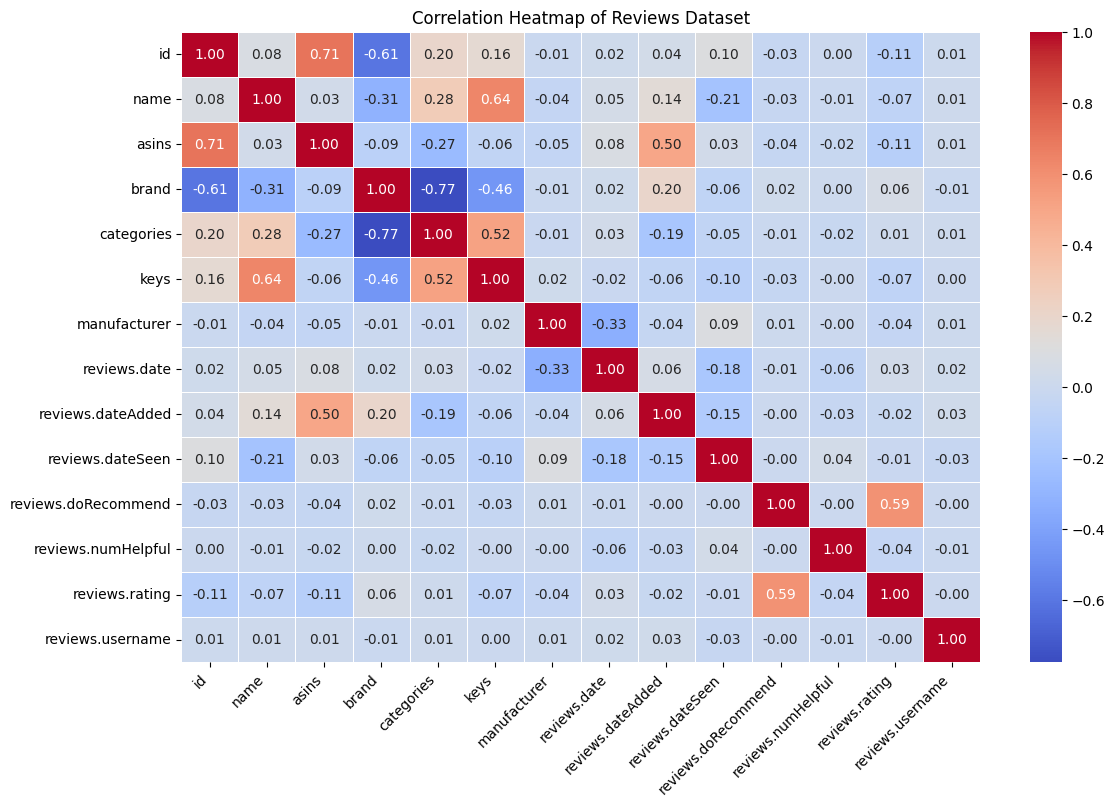

In [96]:
df_old = df.copy()
df = df_numercial
# Compute the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
# readability shit
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)

plt.tight_layout()
plt.title("Correlation Heatmap of Reviews Dataset")
plt.show()


# **Insights from Correlation Heatmap**

## **Key Findings & Business Impact**

| # | Key Insight | Business Impact |
|---|------------|----------------|
| 1 | **ID & ASINs are highly correlated** (0.71) | One of these fields may be redundant; ASINs should be prioritized. |
| 2 | **Brand & Categories have a strong negative correlation** (-0.77) | Some brands dominate specific categories; diversification is needed. |
| 3 | **Product names contain key searchable terms** (0.64) | Optimize SEO for better product discoverability. |
| 4 | **ASINs are linked to time periods** (0.50) | Identify product launch trends to optimize future releases. |
| 5 | **Higher ratings mean more recommendations** (0.59) | Incentivize highly rated customers to leave recommendations. |
| 6 | **Review helpfulness is independent of rating** (-0.04) | Highlight informative reviews, not just positive ones. |
| 7 | **Older reviews remain helpful** (-0.06) | Do not remove old reviews, as they still provide value to customers. |

## **General insight**

- **Optimize Product Listings**: Since product names contain relevant keywords, improving product descriptions will increase visibility.
- **Monitor Brand Monopolization**: Some brands dominate specific categories, which could indicate market saturation.
- **Leverage Review Insights**: Older reviews continue to be useful, so keep highlighting valuable feedback.
- **Analyze Rating-Helpfulness Mismatch**: If low-rated reviews are also marked helpful, brands should address these pain points.

## **Action that can be done**

- **Improve searchability** by ensuring product titles and metadata contain relevant keywords.
- **Use ASINs as primary identifiers** since they are strongly correlated with product IDs.
- **Analyze brand category distribution** to identify monopolization risks and diversification opportunities.
- **Highlight helpful reviews in listings**, regardless of rating, to enhance customer trust.

## Examples of other analysis that can be done (the rest of hte team can do them)

### Distribution of Ratings (Example not sure if useful)

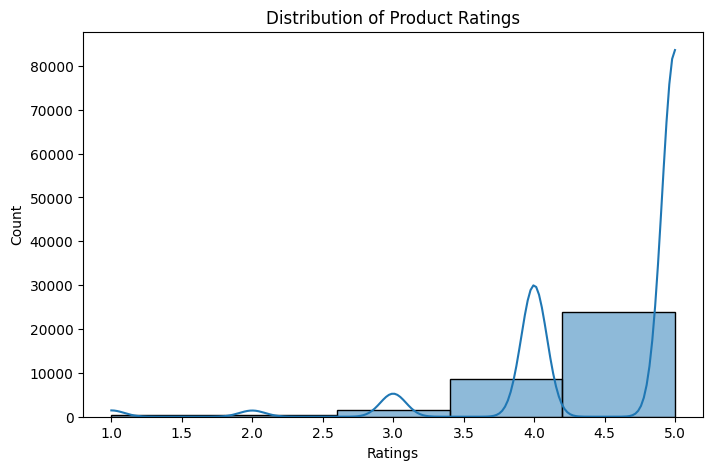

In [97]:
plt.figure(figsize=(8, 5))
sns.histplot(df['reviews.rating'], bins=5, kde=True)
plt.title("Distribution of Product Ratings")
plt.xlabel("Ratings")
plt.ylabel("Count")
plt.show()


 ### Relationship Between Rating & Helpfulness(Example not sure if useful)

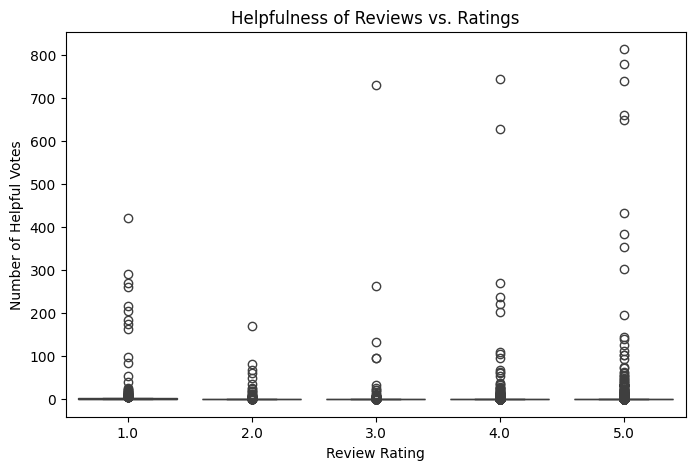

In [98]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['reviews.rating'], y=df['reviews.numHelpful'])
plt.title("Helpfulness of Reviews vs. Ratings")
plt.xlabel("Review Rating")
plt.ylabel("Number of Helpful Votes")
plt.show()


### Average Rating by Brand(Example not sure if useful)


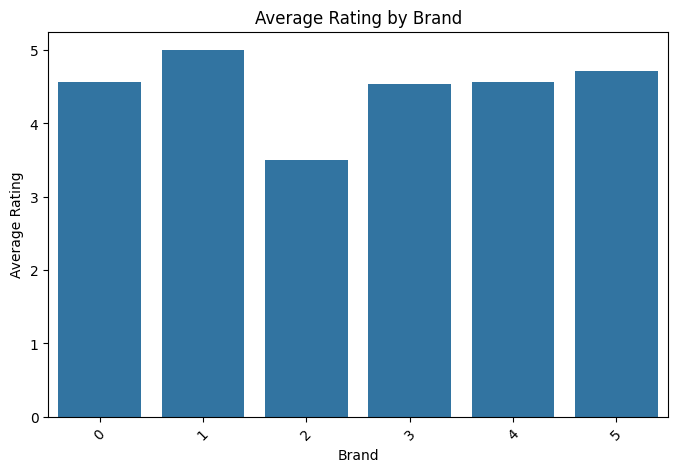

In [99]:
brand_ratings = df.groupby("brand")["reviews.rating"].mean().sort_values()
plt.figure(figsize=(8, 5))
sns.barplot(x=brand_ratings.index, y=brand_ratings.values)
plt.title("Average Rating by Brand")
plt.xlabel("Brand")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.show()


### Trend of Reviews Over Time(Example not sure if useful)

/tmp/ipykernel_13849/200706475.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  reviews_per_month = df.groupby(df["reviews.date"].dt.to_period("M")).size()


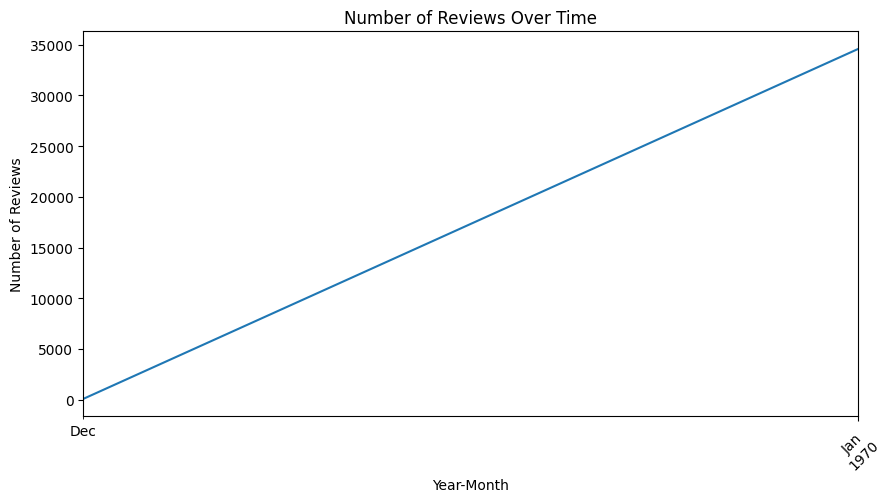

In [100]:
df["reviews.date"] = pd.to_datetime(df["reviews.date"], errors="coerce", utc=True)
reviews_per_month = df.groupby(df["reviews.date"].dt.to_period("M")).size()

plt.figure(figsize=(10, 5))
reviews_per_month.plot()
plt.title("Number of Reviews Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.show()
